In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data.csv")

In [3]:
all_df['class']= all_df['class'].map({'RB':0, 'NRB': 1}).astype(int)

In [4]:
all_df.shape

(1055, 42)

In [5]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [6]:
Y = all_df['class'].values.astype('int64')

In [7]:
X.shape

(1055, 41)

In [8]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

844

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [10]:
model = Sequential()

In [11]:
model.add(Dense(units=41*4,   input_dim=41,
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=41*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=41*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=41, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 164)               6888      
_________________________________________________________________
dense_2 (Dense)              (None, 123)               20295     
_________________________________________________________________
dense_3 (Dense)              (None, 82)                10168     
_________________________________________________________________
dense_4 (Dense)              (None, 41)                3403      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 42        
Total params: 40,796
Trainable params: 40,796
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=60,verbose=1,callbacks=[early_stopping])

Train on 759 samples, validate on 85 samples
Epoch 1/30
759/759 [==============================] - 3s 4ms/step - loss: 0.6902 - acc: 0.6482 - val_loss: 0.6786 - val_acc: 0.7059
Epoch 2/30
759/759 [==============================] - 0s 372us/step - loss: 0.6389 - acc: 0.6680 - val_loss: 0.4898 - val_acc: 0.7059
Epoch 3/30
759/759 [==============================] - 0s 302us/step - loss: 0.4652 - acc: 0.6693 - val_loss: 0.3392 - val_acc: 0.7529
Epoch 4/30
759/759 [==============================] - 0s 282us/step - loss: 0.4230 - acc: 0.8472 - val_loss: 0.3147 - val_acc: 0.8824
Epoch 5/30
759/759 [==============================] - 0s 250us/step - loss: 0.3870 - acc: 0.8735 - val_loss: 0.2837 - val_acc: 0.8941
Epoch 6/30
759/759 [==============================] - 0s 275us/step - loss: 0.3367 - acc: 0.8854 - val_loss: 0.2524 - val_acc: 0.8588
Epoch 7/30
759/759 [==============================] - 0s 285us/step - loss: 0.2950 - acc: 0.8920 - val_loss: 0.2424 - val_acc: 0.8824
Epoch 8/30
759/759 

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

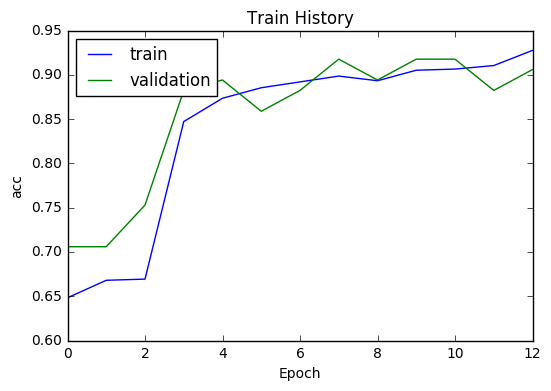

In [20]:
show_train_history(train_history,'acc','val_acc')

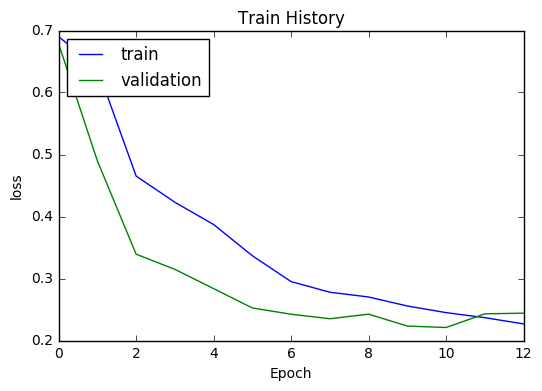

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

211/211 [==============================] - 0s 100us/step


In [23]:
scores[1]

0.8199052118577098